In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import GRU, Embedding, Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

data = pd.read_csv('/Users/sandundesilva/Documents/4th year/Research Project/UI/findMyFilm/flask-server/Models/final/GenreDataset/Final_movie_train.csv')

X = data['subtitles']
y = pd.get_dummies(data['genre'])

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

maxlen = 100
X_pad = pad_sequences(X_seq, maxlen=maxlen)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen))
model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y.columns), activation='softmax'))

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/20
215/215 [==============================] - 10s 41ms/step - loss: 3.2823 - accuracy: 0.0408 - val_loss: 3.2658 - val_accuracy: 0.0577
Epoch 2/20
215/215 [==============================] - 9s 40ms/step - loss: 3.2386 - accuracy: 0.0662 - val_loss: 3.1371 - val_accuracy: 0.0997
Epoch 3/20
215/215 [==============================] - 9s 42ms/step - loss: 3.0752 - accuracy: 0.0898 - val_loss: 2.9634 - val_accuracy: 0.1089
Epoch 4/20
215/215 [==============================] - 9s 42ms/step - loss: 2.9219 - accuracy: 0.1114 - val_loss: 2.9374 - val_accuracy: 0.1063
Epoch 5/20
215/215 [==============================] - 9s 40ms/step - loss: 2.8002 - accuracy: 0.1461 - val_loss: 2.9785 - val_accuracy: 0.1234
Epoch 6/20
215/215 [==============================] - 8s 39ms/step - loss: 2.6589 - accuracy: 0.1830 - val_loss: 2.9069 - val_accuracy: 0.1483
Epoch 7/20
215/215 [==============================] - 8s 39ms/step - loss: 2.5208 - accuracy: 0.2263 - val_loss: 3.0251 - val_accuracy: 0.136

60/60 [==============================] - 1s 4ms/step


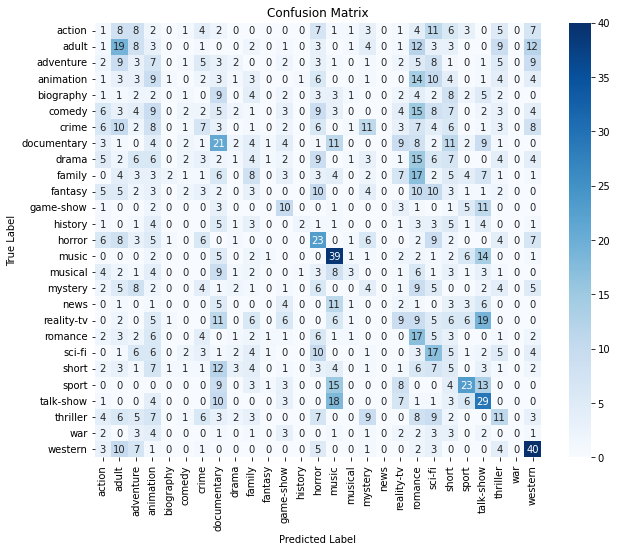

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
